In [1]:
print('hello')

hello


In [2]:
import numpy as np
import pandas as pd
import os
os.getcwd()
os.chdir('/Users/martinkihn/Desktop')
os.getcwd()

'/Users/martinkihn/Desktop'

In [3]:
pwd

'/Users/martinkihn/Desktop'

In [79]:
with open('text_newlines_original.txt') as f:
    text = f.read()
f.close()

In [80]:
len(text)

91920

In [6]:
type(text)

str

In [7]:
text = text.replace('\n', '')

In [8]:
len(text)

91662

In [9]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [10]:
import matplotlib

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
additional_stopwords = []
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [13]:
text_clean = basic_clean(text)

In [14]:
text_clean[4:6]

['wife', 'child']

In [15]:
len(text_clean)

8403

In [16]:
#text_clean is a list of lemmatize/cleaned words
#creating a list and a string version
text_clean_list = text_clean.copy()
text_clean_string = ' '.join(text_clean)

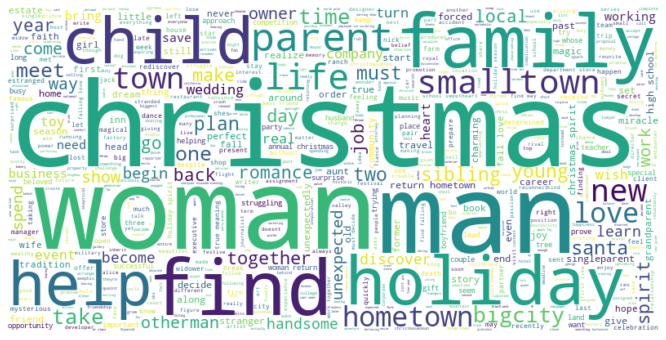

In [17]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, 
              width=800, height=400)
wc.generate(text_clean_string)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#let's look at it without 'woman' 'man' and 'christmas'
to_replace = {'man': '', 'woman': '', 'christmas': '', 'wo': ''}
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
text_clean_string_minus = replace_all(text_clean_string, to_replace)

In [19]:
text_clean_string_minus[4:6]

'ho'

In [1]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, 
              width=800, height=400)
wc.generate(text_clean_string_minus)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'text_clean_string_minus' is not defined

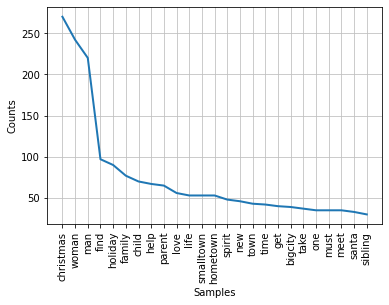

In [21]:
from nltk import FreqDist
fdist1 = FreqDist(text_clean_string.split())
fdist1.plot(25)

In [28]:
bigrams = (pd.Series(nltk.ngrams(text_clean_list, 2)).value_counts())[:25]

In [29]:
bigrams

(woman, man)             15
(woman, find)            15
(christmas, spirit)      14
(high, school)           11
(return, hometown)       11
(annual, christmas)      10
(fall, love)             10
(woman, return)           9
(man, help)               9
(true, meaning)           8
(man, woman)              8
(meet, man)               8
(holiday, spirit)         8
(christmas, wedding)      7
(christmas, woman)        7
(department, store)       7
(find, way)               7
(school, sweetheart)      7
(best, friend)            6
(must, decide)            6
(holiday, season)         6
(hometown, christmas)     6
(hometown, holiday)       6
(work, together)          6
(christmas, approach)     6
dtype: int64

In [30]:
trigrams = (pd.Series(nltk.ngrams(text_clean_list, 3)).value_counts())[:20]

In [31]:
trigrams

(high, school, sweetheart)      7
(woman, return, hometown)       6
(school, sweetheart, man)       5
(old, high, school)             3
(christmas, approach, woman)    3
(town, annual, christmas)       3
(first, time, since)            3
(take, unexpected, turn)        2
(whose, faith, christmas)       2
(true, meaning, christmas)      2
(return, hometown, holiday)     2
(tv, personality, woman)        2
(man, old, high)                2
(wish, come, true)              2
(new, fiance, man)              2
(reconnects, high, school)      2
(interior, designer, woman)     2
(annual, christmas, ice)        2
(christmas, visited, spirit)    2
(spend, holiday, family)        2
dtype: int64

Text(0.5, 1.0, 'Hallmark Xmas Movie Bigrams')

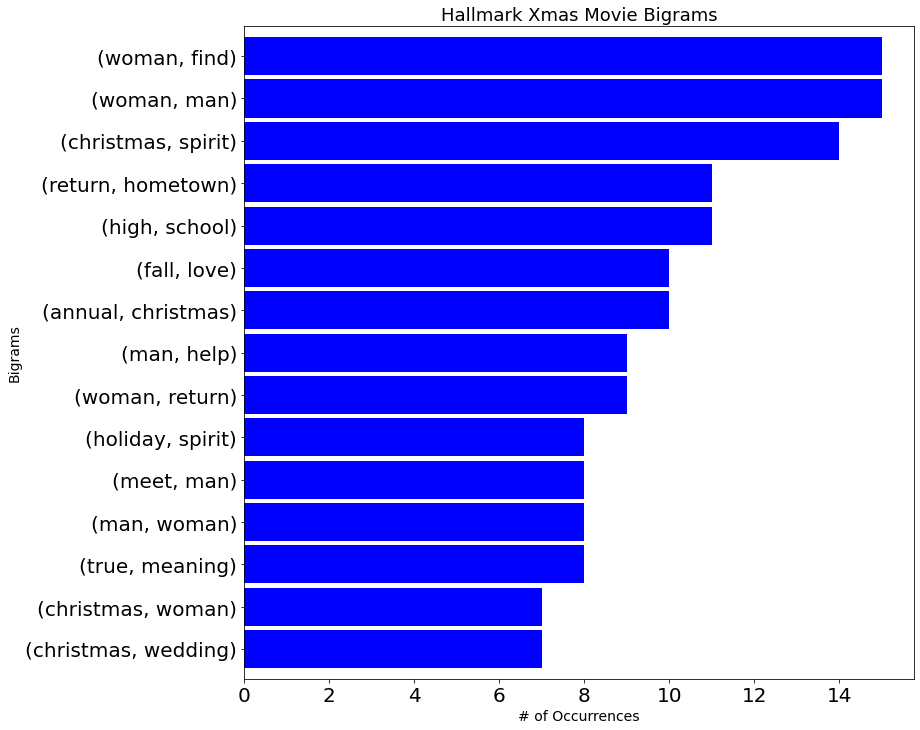

In [47]:
bigrams[:15].sort_values().plot.barh(color='blue',
                                    width=.9, figsize=(12,12))
plt.rcParams.update({'axes.labelsize' : 'large'})
plt.ylabel('Bigrams', fontsize=14)
plt.xlabel('# of Occurrences', fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Hallmark Xmas Movie Bigrams', fontsize=18)

In [49]:
text_tokens = nltk.word_tokenize(text_clean_string)
text_token_text = nltk.Text(text_tokens)

In [50]:
text_token_text

<Text: skishop owner reluctantly move wife child estate livein...>

In [51]:
# try 'similar' function on key words
# family, inn, store, tree, boyfriend, rival, reconnect

In [53]:
text = text_token_text

In [55]:
words = ['family', 'inn', 'store', 'tree', 'boyfriend', 'rival', 'reconnect']

In [62]:
for word in words:
    print('\nword: {}  similars: '.format(word))
    text.similar(word)


word: family  similars: 
christmas work crush late inspiration

word: inn  similars: 
shop

word: store  similars: 


word: tree  similars: 
estranged fantasy evans hat home wherever

word: boyfriend  similars: 
right

word: rival  similars: 
crush flame

word: reconnect  similars: 
meet feel


In [68]:
fdist1.most_common(3)[1][0]

'woman'

In [72]:
common_words = []
for i in range(100):
    c_wd = fdist1.most_common()[i][0]
    common_words.append(c_wd)

In [75]:
len(common_words)

100

In [76]:
for word in common_words:
    print('\nword: {}  similars: '.format(word))
    text.similar(word)


word: christmas  similars: 
family holiday also return arrange secret plaster enjoy stepson crush
dose escapedyears prepare

word: woman  similars: 
child set way santa man school wedding fall agrees trying walk romance
handsome seems home initially shocked cover legacy bestseller

word: man  similars: 
life woman forced teacher slowly business plan thing thrown band
doesnt struggle attendant superintendent

word: find  similars: 
love spiritwhen receives new dubious without gala

word: holiday  similars: 
help time christmas visited true since season even coming loveheavenly

word: family  similars: 
christmas work crush late inspiration

word: child  similars: 
woman consumed max stranded festive little sell

word: help  similars: 
holiday return working three job teenage precocious oldest

word: parent  similars: 
second husband ceo adman entrepreneur hunk

word: love  similars: 
meaning find visit annual sweetheart bittersweet lovewith

word: life  similars: 
yet happinessin man m

In [77]:
# text_clean_list, text_clean_string, and text (tokenized text)

In [181]:
data = []
with open('text_newlines_original.txt',"r") as myfile:
    for line in myfile:
        line = line.replace('\n', '')
        if line == '':
            continue
        else:
            data.append(str(line))
myfile.close()

In [228]:
# original text w/out substitutions for 'man' 'woman' etc. - will just remove 'christmas'
data2 = []
with open('COPY_text_newlines.txt',"r") as myfile:
    for line in myfile:
        line = line.replace('\n', '')
        if line == '':
            continue
        else:
            data2.append(str(line))
myfile.close()

In [236]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martinkihn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinkihn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [237]:
import string
exclude = set(string.punctuation)

In [238]:
def clean(doc):
        stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(wordnet_lemmatizer.lemmatize(word) for word in punc_free.split())
        return normalized

In [185]:
doc_clean = [clean(line).split() for line in data]

In [239]:
doc_clean2 = [clean(line).split() for line in data2]

In [240]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

In [241]:
dictionary2 = corpora.Dictionary(doc_clean2)

In [242]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [243]:
doc_term_matrix2 = [dictionary.doc2bow(doc) for doc in doc_clean2]

In [244]:
Lda = gensim.models.ldamodel.LdaModel

In [246]:
#fit model with matrix for 10 topics
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word=dictionary, passes=50)

In [247]:
ldamodel2 = Lda(doc_term_matrix2, num_topics=4, id2word=dictionary, passes=50)

In [248]:
for idx, topic in ldamodel.print_topics(num_words=4):
    print('Topics: {}  Word: {}'.format(idx, topic))

Topics: 0  Word: 0.012*"family" + 0.009*"christmas" + 0.008*"take" + 0.007*"romance"
Topics: 1  Word: 0.019*"find" + 0.011*"holiday" + 0.011*"love" + 0.010*"parent"
Topics: 2  Word: 0.011*"holiday" + 0.010*"find" + 0.010*"family" + 0.009*"christmas"
Topics: 3  Word: 0.016*"christmas" + 0.010*"woman" + 0.010*"help" + 0.009*"holiday"
Topics: 4  Word: 0.016*"smalltown" + 0.010*"family" + 0.010*"find" + 0.009*"life"
Topics: 5  Word: 0.009*"child" + 0.008*"town" + 0.008*"love" + 0.008*"resort"
Topics: 6  Word: 0.011*"help" + 0.010*"town" + 0.010*"holiday" + 0.009*"smalltown"
Topics: 7  Word: 0.018*"woman" + 0.012*"christmas" + 0.011*"man" + 0.011*"life"
Topics: 8  Word: 0.014*"find" + 0.014*"christmas" + 0.011*"woman" + 0.011*"parent"
Topics: 9  Word: 0.015*"holiday" + 0.012*"woman" + 0.008*"spirit" + 0.008*"man"


In [249]:
for idx, topic in ldamodel2.print_topics(num_words=5):
    print('Topics: {}  Words: {}'.format(idx, topic))

Topics: 0  Words: 0.034*"christmas" + 0.012*"holiday" + 0.011*"family" + 0.010*"find" + 0.008*"help"
Topics: 1  Words: 0.014*"christmas" + 0.009*"life" + 0.008*"find" + 0.007*"meet" + 0.007*"town"
Topics: 2  Words: 0.026*"christmas" + 0.012*"find" + 0.009*"new" + 0.007*"holiday" + 0.007*"help"
Topics: 3  Words: 0.027*"christmas" + 0.010*"holiday" + 0.008*"life" + 0.007*"love" + 0.005*"town"


In [250]:
print(doc_clean[2][1])

teen


In [198]:
removals = ['christmas', 'man', 'woman']
temp = [[wd for wd in doc if wd not in removals] for doc in doc_clean]

In [251]:
# doc2 will only take out 'christmas' to rerun model
removals = ['christmas']
temp2 = [[wd for wd in doc if wd not in removals] for doc in doc_clean2]

In [252]:
len(doc_clean), len(temp2)

(259, 260)

In [ ]:
# temp is the new doc without the 'removals' words

In [205]:
dictionary = corpora.Dictionary(temp)

In [253]:
dictionary = corpora.Dictionary(temp2)

In [206]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in temp]

In [254]:
doc_term_matrix3 = [dictionary.doc2bow(doc) for doc in temp2]

In [207]:
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word=dictionary, passes=50)

In [216]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topics: {}  Word: {}'.format(idx, topic))

Topics: 0  Word: 0.020*"spirit" + 0.011*"new" + 0.009*"parent" + 0.009*"young" + 0.009*"holiday" + 0.009*"time" + 0.009*"smalltown" + 0.008*"find" + 0.007*"child" + 0.007*"wish"
Topics: 1  Word: 0.012*"holiday" + 0.012*"romance" + 0.010*"take" + 0.008*"santa" + 0.008*"smalltown" + 0.006*"parent" + 0.006*"family" + 0.006*"get" + 0.006*"little" + 0.006*"show"
Topics: 2  Word: 0.016*"help" + 0.016*"holiday" + 0.011*"time" + 0.009*"new" + 0.009*"family" + 0.007*"life" + 0.007*"get" + 0.007*"smalltown" + 0.007*"business" + 0.007*"town"
Topics: 3  Word: 0.031*"family" + 0.015*"life" + 0.012*"help" + 0.012*"store" + 0.009*"santa" + 0.009*"love" + 0.009*"order" + 0.009*"set" + 0.009*"fox" + 0.009*"save"
Topics: 4  Word: 0.011*"find" + 0.009*"town" + 0.009*"life" + 0.009*"santa" + 0.008*"child" + 0.008*"family" + 0.007*"parent" + 0.007*"bigcity" + 0.007*"heart" + 0.007*"local"
Topics: 5  Word: 0.015*"family" + 0.011*"life" + 0.011*"bigcity" + 0.010*"smalltown" + 0.009*"take" + 0.007*"year" + 0.

In [256]:
ldamodel3 = Lda(doc_term_matrix3, num_topics=5, id2word=dictionary, passes=50)

In [258]:
for idx, topic in ldamodel3.print_topics(-1):
    print('Topics: {}  Word: {}'.format(idx, topic))

Topics: 0  Word: 0.011*"find" + 0.007*"town" + 0.006*"holiday" + 0.006*"nick" + 0.006*"love" + 0.006*"meet" + 0.005*"help" + 0.005*"must" + 0.005*"new" + 0.005*"small"
Topics: 1  Word: 0.011*"family" + 0.011*"find" + 0.010*"holiday" + 0.007*"new" + 0.007*"town" + 0.005*"love" + 0.005*"romance" + 0.005*"life" + 0.004*"spirit" + 0.004*"take"
Topics: 2  Word: 0.009*"holiday" + 0.009*"family" + 0.007*"new" + 0.007*"town" + 0.006*"life" + 0.005*"two" + 0.005*"home" + 0.005*"love" + 0.004*"young" + 0.004*"heart"
Topics: 3  Word: 0.012*"help" + 0.009*"find" + 0.007*"time" + 0.007*"holiday" + 0.007*"life" + 0.006*"two" + 0.005*"together" + 0.005*"get" + 0.005*"love" + 0.005*"family"
Topics: 4  Word: 0.008*"holiday" + 0.007*"love" + 0.006*"find" + 0.006*"new" + 0.005*"life" + 0.005*"eve" + 0.005*"spirit" + 0.005*"one" + 0.004*"meet" + 0.004*"begin"


In [209]:
!pip install pyLDAvis

In [214]:
from gensim import models
import warnings
warnings.filterwarnings('ignore')

In [215]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.081041  0.052087       1        1  10.012241
5     -0.063791 -0.101562       2        1   7.302813
15    -0.078706 -0.002889       3        1   6.867043
19    -0.084086 -0.040120       4        1   6.722432
9     -0.051465  0.072660       5        1   6.697233
10    -0.016186  0.098837       6        1   6.544176
11    -0.044725  0.060559       7        1   6.358533
1     -0.021405 -0.081027       8        1   4.953523
7     -0.028052 -0.017674       9        1   4.939547
8      0.005482  0.071062      10        1   4.760164
6      0.110948  0.030705      11        1   4.318995
4      0.053231 -0.113301      12        1   4.307949
16     0.098728  0.017674      13        1   4.149328
2     -0.034337  0.004140      14        1   4.090869
0     -0.016653 -0.021152      15        1   4.001898
12     0.046871  0.050907      16        1   3.920268
17     0.087259 -0.027056      17        1   2.872213
18     0.041166  0.009817      18        1   2.793689
3      0.004760 -0.065346      19        1   2.637981
14     0.072005  0.001679      20        1   1.749105, topic_info=          Term       Freq      Total Category  logprob  loglift
7         help  50.000000  50.000000  Default   30.000  30.0000
6       family  60.000000  60.000000  Default   29.000  29.0000
109      santa  25.000000  25.000000  Default   28.000  28.0000
117       love  50.000000  50.000000  Default   27.000  27.0000
575      store  12.000000  12.000000  Default   26.000  26.0000
...        ...        ...        ...      ...      ...      ...
1153      term   0.541467   5.106123  Topic20   -5.523   1.8022
528   assigned   0.541467   3.429476  Topic20   -5.523   2.2002
131       come   0.541467  15.304424  Topic20   -5.523   0.7045
39        past   0.541467  10.269108  Topic20   -5.523   1.1035
754        job   0.541467  16.364709  Topic20   -5.523   0.6375

[1479 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
860      18  0.745449         10
878       2  0.658655   10months
1070      5  0.335085  10yearold
1070      9  0.670170  10yearold
1694      9  0.685556       2016
...     ...       ...        ...
1495     11  0.122738          –
1495     15  0.122738          –
1495     20  0.122738          –
2704     11  0.697439        “12
2619     17  0.739620       “the

[2702 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 6, 16, 20, 10, 11, 12, 2, 8, 9, 7, 5, 17, 3, 1, 13, 18, 19, 4, 15])

In [262]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel3, doc_term_matrix3, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.054047 -0.065794       1        1  24.100988
3      0.112809  0.018340       2        1  21.417830
0     -0.057306  0.106853       3        1  19.800976
2     -0.019622 -0.041746       4        1  18.865464
4      0.018167 -0.017654       5        1  15.814742, topic_info=         Term       Freq      Total Category  logprob  loglift
222  stranger   9.000000   9.000000  Default  30.0000  30.0000
127      nick  17.000000  17.000000  Default  29.0000  29.0000
919   hillary   4.000000   4.000000  Default  28.0000  28.0000
32        eve  13.000000  13.000000  Default  27.0000  27.0000
8        help  51.000000  51.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
103      town   4.291102  48.026145   Topic5  -5.7711  -0.5710
7      family   4.400182  56.519668   Topic5  -5.7460  -0.7087
292      plan   3.763398  22.823159   Topic5  -5.9023   0.0418
622      make   3.602930  19.092814   Topic5  -5.9459   0.1767
59       time   3.661483  33.185899   Topic5  -5.9298  -0.3600

[386 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
842       3  0.817837     aaron
2946      3  0.681547     abbey
2179      1  0.658935  adelaide
2563      2  0.671939      alec
2795      1  0.881865   alice’s
...     ...       ...       ...
109       3  0.087762     young
109       4  0.307166     young
109       5  0.131642     young
2462      1  0.881865      zeke
2581      2  0.671939      zoey

[654 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

In [218]:
# i will try tfidf topic tagging
tfidf = models.TfidfModel(doc_term_matrix)
tfidf_corpus = tfidf[doc_term_matrix]

In [221]:
%%time
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corpus, num_topics=6, id2word=dictionary, passes=2)
lda_model_tfidf.save('lda_tfidf.model')

CPU times: user 666 ms, sys: 188 ms, total: 854 ms
Wall time: 1.36 s


In [222]:
for idx, topic in lda_model_tfidf.print_topics(-1):
  print('Topic: {}  Word: {}'.format(idx, topic))

Topic: 0  Word: 0.002*"find" + 0.002*"hometown" + 0.002*"family" + 0.002*"meet" + 0.002*"spirit" + 0.002*"party" + 0.002*"future" + 0.002*"way" + 0.002*"annual" + 0.001*"holiday"
Topic: 1  Word: 0.002*"spirit" + 0.002*"past" + 0.002*"child" + 0.002*"sibling" + 0.002*"aunt" + 0.001*"help" + 0.001*"soon" + 0.001*"old" + 0.001*"town" + 0.001*"ice"
Topic: 2  Word: 0.002*"life" + 0.002*"inn" + 0.002*"holiday" + 0.002*"help" + 0.002*"together" + 0.002*"parent" + 0.002*"smalltown" + 0.002*"start" + 0.001*"find" + 0.001*"farm"
Topic: 3  Word: 0.002*"help" + 0.002*"find" + 0.002*"santa" + 0.002*"holiday" + 0.002*"must" + 0.002*"life" + 0.001*"fate" + 0.001*"love" + 0.001*"spirit" + 0.001*"season"
Topic: 4  Word: 0.002*"town" + 0.002*"little" + 0.002*"sibling" + 0.002*"school" + 0.002*"girl" + 0.002*"family" + 0.002*"together" + 0.002*"new" + 0.002*"work" + 0.001*"love"
Topic: 5  Word: 0.002*"parent" + 0.002*"time" + 0.002*"otherman" + 0.002*"family" + 0.002*"holiday" + 0.002*"get" + 0.002*"chil

In [223]:
pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.033617 -0.008129       1        1  19.683395
5      0.013493 -0.023222       2        1  18.434542
4      0.000356  0.026284       3        1  17.594484
2      0.009207  0.001796       4        1  16.003549
3      0.006743  0.000574       5        1  14.391548
1      0.003817  0.002698       6        1  13.892482, topic_info=        Term      Freq     Total Category  logprob  loglift
246     fate  0.000000  0.000000  Default  30.0000  30.0000
39      past  0.000000  0.000000  Default  29.0000  29.0000
941   little  0.000000  0.000000  Default  28.0000  28.0000
63      aunt  0.000000  0.000000  Default  27.0000  27.0000
560     girl  0.000000  0.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
370       go  0.195214  1.059996   Topic6  -6.7825   0.2819
224     show  0.194479  1.070857   Topic6  -6.7863   0.2679
8       life  0.199857  1.698621   Topic6  -6.7590  -0.1661
117     love  0.199065  1.671949   Topic6  -6.7630  -0.1543
31   holiday  0.191452  1.858251   Topic6  -6.8019  -0.2989

[398 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 3, 4, 2])

In [224]:
# label the stories by topic area - most likely fit
# see if there are categories that make sense
# then can do word2vec and doc2vec tagging
# word2vec can look for most 'similar' to key words in each topic

In [263]:
# temp2 is original text minus 'christmas' - doc_term_matrix3 is the matrix on this text - ldamodel3 is model

In [265]:
temp2[4:5]

[['magical',
  'story',
  'scientist',
  'set',
  'prove',
  'reindeer',
  'fly',
  'along',
  'way',
  'discovers',
  'true',
  'meaning',
  'faith',
  'family']]

In [266]:
import spacy

In [267]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in temp2:
        doc = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [269]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [297]:
#make bigrams
bigram = gensim.models.Phrases(temp2, min_count=2, threshold=20)

In [298]:
bigram

In [299]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [300]:
bigram_mod

In [301]:
import nltk
from nltk.corpus import stopwords

In [302]:
stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return[[word for word in doc if word not in stop_words] for doc in temp2]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in temp2]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [305]:
data_words_nostops = remove_stopwords(temp2)

In [306]:
data_words_bigrams = make_bigrams(data_words_nostops)

In [307]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [310]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [311]:
print(data_lemmatized[:1])

[['owner', 'reluctantly', 'move', 'wife', 'help', 'elderly', 'widow', 'struggle', 'balance', 'career', 'family', 'life', 'recur', 'dream', 'angel']]


In [312]:
# LDA topic modeling - creating the dictionary and the corpus

In [313]:
import gensim.corpora as corpora

In [314]:
id2word = corpora.Dictionary(data_lemmatized)

In [315]:
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [316]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [318]:
# the above is mapping of word_id (unique via gensim) and word_frequency per document (plot)

In [319]:
# need corpus, dictionary and number of topics (also alpha & eta params)

In [320]:
# 'chunksize' is how many docs processed at a time (memory/speed)
# 'passes' controls how often we train model on entire corpus (like epochs)

In [321]:
# build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=10,
                                      random_state=100,
                                      chunksize=20,
                                      passes=10,
                                      per_word_topics=True)

In [322]:
from pprint import pprint

#print keywords in 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"time" + 0.010*"find" + 0.009*"stay" + 0.008*"long" + 0.007*"hire" + '
  '0.006*"take" + 0.006*"struggle" + 0.006*"lawyer" + 0.006*"tree" + '
  '0.006*"sell"'),
 (1,
  '0.015*"town" + 0.013*"find" + 0.013*"wedding" + 0.010*"heart" + '
  '0.009*"family" + 0.008*"work" + 0.008*"help" + 0.007*"love" + 0.007*"new" + '
  '0.007*"unexpected"'),
 (2,
  '0.010*"family" + 0.009*"time" + 0.009*"work" + 0.009*"’" + 0.008*"plan" + '
  '0.008*"party" + 0.008*"together" + 0.008*"discover" + 0.008*"meet" + '
  '0.008*"romance"'),
 (3,
  '0.013*"find" + 0.009*"take" + 0.009*"get" + 0.008*"time" + 0.008*"family" + '
  '0.007*"new" + 0.007*"meet" + 0.007*"end" + 0.006*"unexpected" + '
  '0.006*"business"'),
 (4,
  '0.015*"’" + 0.015*"take" + 0.010*"help" + 0.010*"job" + 0.010*"event" + '
  '0.009*"family" + 0.008*"decide" + 0.008*"holiday" + 0.008*"love" + '
  '0.007*"team"'),
 (5,
  '0.018*"help" + 0.012*"meet" + 0.009*"find" + 0.008*"time" + 0.008*"holiday" '
  '+ 0.006*"dream" + 0.006*"

In [324]:
# do baseline coherence score
# this section: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [325]:
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.29436612733366985


In [326]:
# hyperparameters are: 'number of topics (K)', alpha = doc topic density, beta = word-topic density

In [327]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                          id2word=dictionary,
                                          num_topics=k,
                                          random_state=100,
                                          chunksize=20,
                                          passes=10,
                                          alpha=a,
                                          eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [328]:
# call function and iterate over topics, alpha and beta hyperparameters

In [329]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

#alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

#beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

In [336]:
#validation sets
num_of_docs = len(corpus)
corpus_sets = [
    # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
    # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5),
    # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75),
    corpus
    ]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                'Topics': [],
                'Alpha': [],
                'Beta': [],
                'Coherence': []
                }

In [337]:
if 1 == 1:
    pbar = tqdm.tqdm()
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # through topics
        for k in topics_range:
            # through alpha values
            for a in alpha:
                # through beta values
                for b in beta:
                    #get coherence score
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b)
                    
# same model results
model_results['Validation_Set'].append(corpus_title[i])
model_results['Topics'].append(k)
model_results['Alpha'].append(a)
model_results['Beta'].append(b)
model_results['Coherence'].append(cv)

pbar.update(1)

pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
pbar.close()


0it [00:46, ?it/s]


KeyboardInterrupt: 

In [340]:
list_to_save = [" ".join(doc) for doc in temp2]

In [345]:
list_to_save[3:4]

['miracle occurs homeless family consisting two wayward child protective aunt help angel young woman niece nephew threatened foster care sister hospitalized following yet another overdose flees land sleepy town bethlehem series kindness coincidence give trio chance happiness']

In [344]:
# save temp2 as list_minus_xmas.txt to desktop/drive
with open('doclist_minus_xmas.txt', 'w') as f:
    for item in list_to_save:
        f.write(str(item) + "\n")
f.close()

In [346]:
# went through selection of parameters in the Colab notebook 'LDA with Parameters'
# basically it didn't work - all in a single topic
# my original analyses were more intuitive ... can redo using the tested params
# these were:
# K topics = 8
# alpha and beta = 0.9 [quite high - prob a warning sign]